In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhaskarpaymal","key":"ad47203a93785d2fdeea587a478bdcfd"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d arbethi/diabetic-retinopathy-level-detection

Dataset URL: https://www.kaggle.com/datasets/arbethi/diabetic-retinopathy-level-detection
License(s): CC0-1.0
ad47203a93785d2fdeea587a478bdcfd
ad47203a93785d2fdeea587a478bdcfd
^C


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!cp -r "/content/drive/MyDrive/Deep Learning Fundus Image Analysis for Early Detection of Diabetic Retinopathy/Dataset/preprocessed dataset/preprocessed dataset" /content/

In [14]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception, preprocess_input
import numpy as np
import matplotlib.pyplot as plt

In [4]:


testing_path = "/content/drive/MyDrive/Deep Learning Fundus Image Analysis for Early Detection of Diabetic Retinopathy/Dataset/preprocessed dataset/preprocessed dataset/testing"

training_path = "/content/drive/MyDrive/Deep Learning Fundus Image Analysis for Early Detection of Diabetic Retinopathy/Dataset/preprocessed dataset/preprocessed dataset/training"

In [21]:
training_path = "/content/preprocessed dataset/training"
testing_path = "/content/preprocessed dataset/testing"

In [22]:
img_size = (299, 299)
batch_size = 32

In [23]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [24]:
train_generator = train_datagen.flow_from_directory(
    training_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    testing_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3662 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


In [25]:
print(train_generator.class_indices)


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}


In [26]:
# Load Xception without top layer
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(299, 299, 3)
)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


In [27]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Output layer
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [28]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [29]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)


Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 655s 5s/step - accuracy: 0.6449 - loss: 0.9855 - val_accuracy: 0.6907 - val_loss: 0.8505
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 548s 5s/step - accuracy: 0.7399 - loss: 0.6846 - val_accuracy: 0.7589 - val_loss: 0.5979
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 544s 5s/step - accuracy: 0.7737 - loss: 0.5848 - val_accuracy: 0.7548 - val_loss: 0.5983
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 541s 5s/step - accuracy: 0.7815 - loss: 0.5845 - val_accuracy: 0.7589 - val_loss: 0.5903
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 541s 5s/step - accuracy: 0.7911 - loss: 0.5430 - val_accuracy: 0.7766 - val_loss: 0.5938
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 544s 5s/step - accuracy: 0.7880 - loss: 0.5511 - val_accuracy: 0.8038 - val_loss: 0.5121
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 547s 5s/step - accuracy: 0.8002 - loss: 0.5283 - val_accuracy: 0.7534 - val_loss: 0.6342
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 540s 5s/step - accuracy: 0.8030 - loss: 0.5024 - val_accu

In [30]:
model.save("Updated-Xception-diabetic-retinopathy.h5")


In [31]:
from google.colab import files
files.download("Updated-Xception-diabetic-retinopathy.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

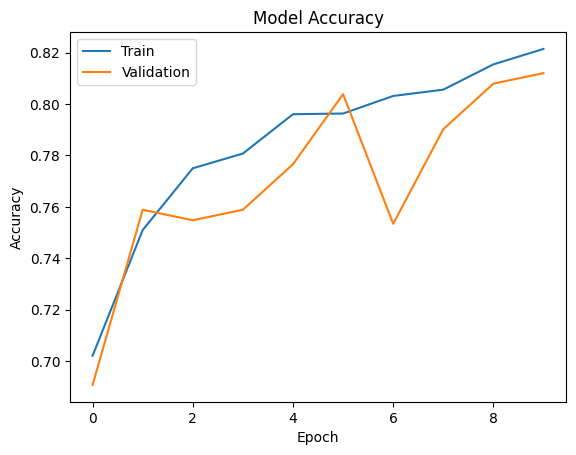

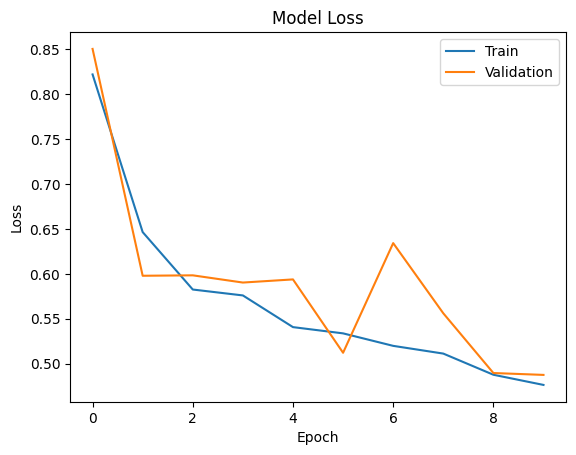

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
